# Spring Mass Calibration

###### Objectives of the Experiment: 

Understanding the working principle of spring mass system,
experimenting the hysteresis effect, method of least squares and calibration.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
import math

### The Example of Period Detection

In [2]:
one = pd.read_csv('data2/5.csv')
one

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2)
0,0.000000,0.168407,-0.169823,-0.028083
1,0.029992,0.192031,-0.155867,0.071152
2,0.059984,0.217640,-0.143643,0.164289
3,0.089977,0.241904,-0.133441,0.248289
4,0.119969,0.260029,-0.125589,0.318374
...,...,...,...,...
263,7.402366,-0.121755,-0.263425,0.142874
264,7.422427,-0.022974,-0.235087,0.265282
265,7.442489,0.078413,-0.010712,0.385757
266,7.462551,-0.202572,0.342666,-0.025831


Text(0, 0.5, 'Y Acceleration')

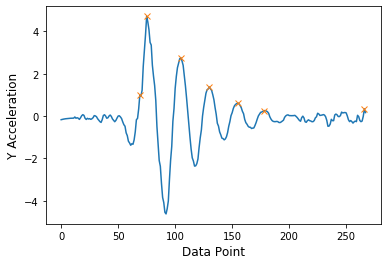

In [3]:
x_1 = one['Acceleration y (m/s^2)']
peaks_one, _ = signal.find_peaks(x_1, height=0.25)
plt.plot(x_1)
plt.plot(peaks_one, x_1[peaks_one], "x")
plt.xlabel('Data Point', fontsize=12)
plt.ylabel('Y Acceleration' ,fontsize=12)

In [4]:
peaks_one

array([ 69,  75, 105, 130, 155, 178, 266], dtype=int64)

In [5]:
round(one['Time (s)'].iloc[105]-one['Time (s)'].iloc[75],2)

0.75

In [6]:
round(one['Time (s)'].iloc[130]-one['Time (s)'].iloc[105],2)

0.75

### Mass - Period Data

In [7]:
balance = pd.read_excel('period_mass.xlsx')
balance

,attempt,mass_kg,period_s
0,1,0.212,0.75
1,2,0.232,0.78
2,3,0.262,0.83
3,4,0.302,0.89
4,5,0.352,0.96
5,6,0.402,1.10
6,7,0.402,1.10
7,8,0.352,0.97
8,9,0.302,0.89
9,10,0.262,0.84


### Unknown Mass

In [8]:
unknown_mass = 1.04

### Mass vs Period Graph

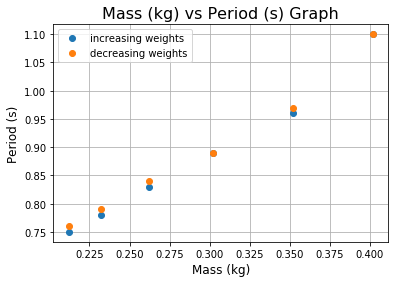

In [9]:
plt.plot(balance['mass_kg'][:6], balance['period_s'][:6],'o', label='increasing weights')
plt.plot(balance['mass_kg'][6:], balance['period_s'][6:],'o',label='decreasing weights')

plt.xlabel('Mass (kg)', fontsize=12)
plt.ylabel('Period (s)', fontsize=12)
plt.title('Mass (kg) vs Period (s) Graph', fontsize=16)
plt.grid(True)
plt.legend()

## Calculations of calibration equation (for increasing weights)

### $a_1 = \frac{n\sum{x_iy_i}-\sum{x_i}\sum{y_i}}{n\sum{(x_i)^2}-(\sum{x_i})^2}$

### $b_1 = \frac{(\sum{y_i})(\sum{x_i})^2-(\sum{x_iy_i})(\sum{x_i})}{n\sum{(x_i)^2}-(\sum{x_i})^2}$

In [10]:
clb_inc = pd.DataFrame(balance['mass_kg'][:6]) # Creating new Dataframe for calculations, mass values are imported as x

clb_inc = clb_inc.rename(columns = {'mass_kg':'x'}) # Renaming the column as x

clb_inc['y'] = balance['period_s'][:6] # Period values are imported as y

clb_inc['x*y'] = clb_inc['x']*clb_inc['y'] # Calculating x*y

clb_inc['x^2'] = clb_inc['x']**2 # Calculating x^2

clb_inc

,x,y,x*y,x^2
0,0.212,0.75,0.15900,0.044944
1,0.232,0.78,0.18096,0.053824
2,0.262,0.83,0.21746,0.068644
3,0.302,0.89,0.26878,0.091204
4,0.352,0.96,0.33792,0.123904
5,0.402,1.10,0.44220,0.161604


In [11]:
clb_inc.to_excel('clb_inc.xlsx') # Writing data in excel format for the report

### Coefficients of the linear calibration equation (y = ax + b) For increasing weights

In [12]:
n=6 # Number of samples

In [13]:
a_inc = ((n*np.sum(clb_inc['x*y'])-np.sum(clb_inc['x'])*np.sum(clb_inc['y']))
         /(n*np.sum(clb_inc['x^2'])-(np.sum(clb_inc['x']))**2)) # The slope of the curve

b_inc = ((np.sum(clb_inc['y'])*np.sum(clb_inc['x^2'])-np.sum(clb_inc['x*y'])*np.sum(clb_inc['x']))
         /(n*np.sum(clb_inc['x^2'])-np.sum(clb_inc['x'])**2)) # Interception point on the y-axis

In [14]:
round(a_inc,6)

1.759525

In [15]:
round(b_inc, 6)

0.368286

###  $y = 1.759525x+0.368286$

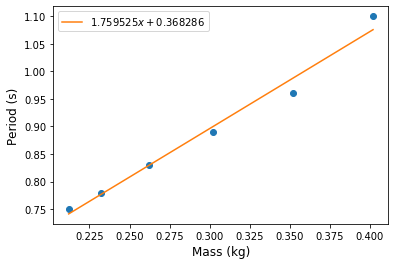

In [16]:
plt.plot(balance['mass_kg'][:6], balance['period_s'][:6],'o')
plt.plot(clb_inc['x'], a_inc*clb_inc['x'] + b_inc, label='$1.759525x+0.368286$')
plt.xlabel('Mass (kg)', fontsize= 12)
plt.ylabel('Period (s)', fontsize= 12)
plt.legend()

In [17]:
mass_inc = (unknown_mass - b_inc) / a_inc # Calculating the unknown mass using the given period output
round(mass_inc,6)

0.381759

## Calculations of calibration equation (for decreasing weights)

In [18]:
clb_dec = pd.DataFrame(balance['mass_kg'][6:]) # Creating new Dataframe for calculations, mass values are imported as x

clb_dec = clb_dec.rename(columns = {'mass_kg':'x'}) # Renaming the column as x

clb_dec['y'] = balance['period_s'][6:] # Period values are imported as y

clb_dec['x*y'] = clb_dec['x']*clb_dec['y'] # Calculating x*y

clb_dec['x^2'] = clb_dec['x']**2 # Calculating x^2

clb_dec

,x,y,x*y,x^2
6,0.402,1.10,0.44220,0.161604
7,0.352,0.97,0.34144,0.123904
8,0.302,0.89,0.26878,0.091204
9,0.262,0.84,0.22008,0.068644
10,0.232,0.79,0.18328,0.053824
11,0.212,0.76,0.16112,0.044944


In [19]:
clb_dec.to_excel('clb_dec.xlsx') # Writing data in excel format for the report

### Coefficients of the linear calibration equation (y = ax + b) For decreasing weights

### $a_2 = \frac{n\sum{x_iy_i}-\sum{x_i}\sum{y_i}}{n\sum{(x_i)^2}-(\sum{x_i})^2}$

### $b_2 = \frac{(\sum{y_i})(\sum{x_i})^2-(\sum{x_iy_i})(\sum{x_i})}{n\sum{(x_i)^2}-(\sum{x_i})^2}$

In [20]:
a_dec = ((n*np.sum(clb_dec['x*y'])-np.sum(clb_dec['x'])*np.sum(clb_dec['y']))
         /(n*np.sum(clb_dec['x^2'])-(np.sum(clb_dec['x']))**2)) # The slope of the curve

b_dec = ((np.sum(clb_dec['y'])*np.sum(clb_dec['x^2'])-np.sum(clb_dec['x*y'])*np.sum(clb_dec['x']))
         /(n*np.sum(clb_dec['x^2'])-np.sum(clb_dec['x'])**2)) # Interception point on the y-axis

In [21]:
round(a_dec,6)

1.715803

In [22]:
round(b_dec, 6)

0.387793

### $y =1.715803x + 0.387793$

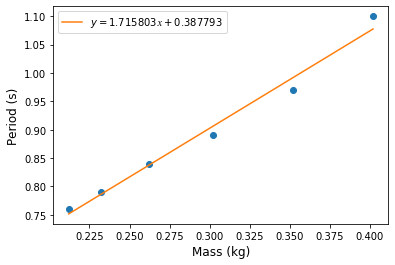

In [23]:
plt.plot(balance['mass_kg'][6:], balance['period_s'][6:],'o')
plt.plot(clb_dec['x'], a_dec*clb_dec['x'] + b_dec, label='$y=1.715803𝑥+0.387793$')
plt.xlabel('Mass (kg)', fontsize= 12)
plt.ylabel('Period (s)', fontsize= 12)
plt.legend()

In [24]:
mass_dec = (unknown_mass - b_dec) / a_dec # Calculating the unknown mass using the given period output
round(mass_dec,6)

0.380118

## Calculations for correlation coefficient (For increasing weights)

In [25]:
cor_inc = pd.DataFrame(balance['mass_kg'][:6]) # Creating new Dataframe for calculations, mass values are imported as x

cor_inc = cor_inc.rename(columns = {'mass_kg':'x'}) # Renaming the column as x

cor_inc['y'] = balance['period_s'][:6] # Period values are imported as y

cor_inc['y-y_avg'] = cor_inc['y']-np.mean(cor_inc['y']) # Differences between y values and avarage y

cor_inc['(y-y_avg)^2'] = cor_inc['y-y_avg']**2 # Squares of the differences

cor_inc['y_c'] = a_inc*cor_inc['x'] + b_inc # Calculating y values using the calibration equation

cor_inc['y-y_c'] = cor_inc['y']-cor_inc['y_c'] # Differences between y values and calculated y values

cor_inc['(y-y_c)^2'] = cor_inc['y-y_c']**2 # Squares of the differences

cor_inc

,x,y,y-y_avg,(y-y_avg)^2,y_c,y-y_c,(y-y_c)^2
0,0.212,0.75,-0.135,0.018225,0.741305,0.008695,7.559548e-05
1,0.232,0.78,-0.105,0.011025,0.776496,0.003504,1.227844e-05
2,0.262,0.83,-0.055,0.003025,0.829282,0.000718,5.159564e-07
3,0.302,0.89,0.005,0.000025,0.899663,-0.009663,9.336798e-05
4,0.352,0.96,0.075,0.005625,0.987639,-0.027639,7.639130e-04
5,0.402,1.10,0.215,0.046225,1.075615,0.024385,5.946165e-04


In [26]:
cor_inc.to_excel('cor_inc.xlsx') # Writing data in excel format for the report

### Calculating $\sigma_y$, $\sigma_{y,x}$ and $R$ (Correlation Coefficent) for increasing weights

### $\sigma_y = (\frac{\sum_{i=1}^{n} (y_i-y_{avg})^2}{n-1})^{1/2}$

### $\sigma_{y,x}= (\frac{\sum_{i=1}^{n} (y_i-y_{calc})^2}{n-2})^{1/2}$

### $R = (1-\frac{(\sigma_{y,x})^2}{(\sigma_y)^2})^{1/2}$

$\sigma_y$

In [27]:
y_std_inc = ((np.sum(cor_inc['(y-y_avg)^2']))/(n-1))**(1/2)
round(y_std_inc,6)

0.12973

$\sigma_{y,x}$

In [28]:
yx_std_inc = ((np.sum(cor_inc['(y-y_c)^2']))/(n-2))**(1/2)
round(yx_std_inc,6)

0.019623

$R$

In [29]:
r_inc = (1-(yx_std_inc)**2/(y_std_inc)**2)**(1/2)
round(r_inc,6)

0.988494

## Calculations for correlation coefficient (For decreasing weights)

In [30]:
cor_dec = pd.DataFrame(balance['mass_kg'][6:]) # Creating new Dataframe for calculations, mass values are imported as x

cor_dec = cor_dec.rename(columns = {'mass_kg':'x'}) # Renaming the column as x

cor_dec['y'] = balance['period_s'][6:] # Period values are imported as y

cor_dec['y-y_avg'] = cor_dec['y']-np.mean(cor_dec['y']) # Differences between y values and avarage y

cor_dec['(y-y_avg)^2'] = cor_dec['y-y_avg']**2 # Squares of the differences

cor_dec['y_c'] = a_dec*cor_dec['x'] + b_dec # Calculating y values using the calibration equation

cor_dec['y-y_c'] = cor_dec['y']-cor_dec['y_c'] # Differences between y values and calculated y values

cor_dec['(y-y_c)^2'] = cor_dec['y-y_c']**2 # Squares of the differences

cor_dec

,x,y,y-y_avg,(y-y_avg)^2,y_c,y-y_c,(y-y_c)^2
6,0.402,1.10,0.208333,0.043403,1.077545,0.022455,0.000504
7,0.352,0.97,0.078333,0.006136,0.991755,-0.021755,0.000473
8,0.302,0.89,-0.001667,0.000003,0.905965,-0.015965,0.000255
9,0.262,0.84,-0.051667,0.002669,0.837333,0.002667,0.000007
10,0.232,0.79,-0.101667,0.010336,0.785859,0.004141,0.000017
11,0.212,0.76,-0.131667,0.017336,0.751543,0.008457,0.000072


In [31]:
cor_dec.to_excel('cor_dec.xlsx') # Writing data in excel format for the report

### Calculating $\sigma_y$, $\sigma_{y,x}$ and $R$ (Correlation Coefficent) for decreasing weights

### $\sigma_y = (\frac{\sum_{i=1}^{n} (y_i-y_{avg})^2}{n-1})^{1/2}$

### $\sigma_{y,x}= (\frac{\sum_{i=1}^{n} (y_i-y_{calc})^2}{n-2})^{1/2}$

### $R = (1-\frac{(\sigma_{y,x})^2}{(\sigma_y)^2})^{1/2}$

$\sigma_y$

In [32]:
y_std_dec = ((np.sum(cor_dec['(y-y_avg)^2']))/(n-1))**(1/2)
round(y_std_dec,6)

0.126399

$\sigma_{y,x}$

In [33]:
yx_std_dec = ((np.sum(cor_dec['(y-y_c)^2']))/(n-2))**(1/2)
round(yx_std_dec,6)

0.018222

$R$

In [34]:
r_dec = (1-(yx_std_dec)**2/(y_std_dec)**2)**(1/2)
round(r_dec,6)

0.989554